In [8]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import pandas as pd
import os, json

In [2]:
#reimporting data
train = keras.utils.image_dataset_from_directory(
    directory='data/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True)
train = train.prefetch(32)
test = keras.utils.image_dataset_from_directory(
    directory='data/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True)
test = test.prefetch(32)
valid = keras.utils.image_dataset_from_directory(
    directory='data/valid/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True)
valid = valid.prefetch(32)

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


In [3]:
#helper code
labelDict = {}
labels = os.listdir('data/test')
for i in range(len(labels)):
    labelDict[i] = labels[i]
labelDict[0]
def getSpecies(labelArray):
    return labelDict[list(labelArray).index(1)]
def dumpTrainHist(history, modelName):
    with open(f'{modelName}.json', 'w') as out:
        json.dump(history.history, out)
input_shape = (224,224,3)

In [10]:
#get model training data for comparison
models = {}
jsonFiles = [file for file in os.listdir() if file.endswith('.json')]
for file in jsonFiles:
    modelName = file[:-5]
    with open(file, 'r') as f:
        models[modelName] = json.load(f)

In [12]:
models['basicNN'].keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
#get model training data for comparison
loss = pd.DataFrame()
accuracy = pd.DataFrame()
val_loss = pd.DataFrame()
val_accuracy = pd.DataFrame()
jsonFiles = [file for file in os.listdir() if file.endswith('.json')]
jsonFiles.remove('basicNN.json') #the weird numbers on this useless model make graphing hard
for file in jsonFiles:
    modelName = file[:-5]
    with open(file, 'r') as f:
        model = json.load(f)
    loss[modelName] = model['loss']
    accuracy[modelName] = model['accuracy']
    val_loss[modelName] = model['val_loss']
    val_accuracy[modelName] = model['val_accuracy']

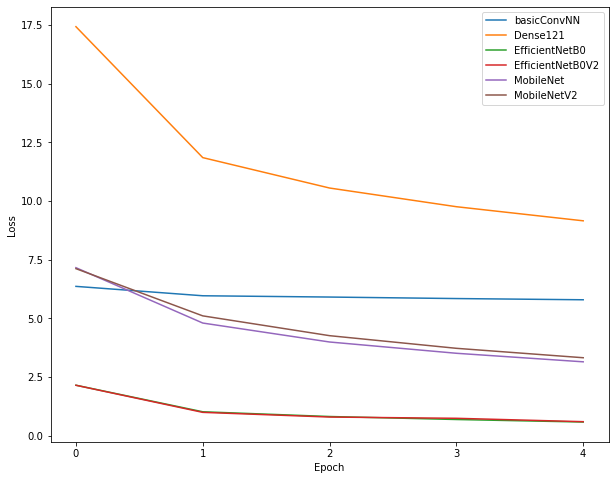

In [51]:
_=loss.plot(figsize=(10,8), xticks=range(5), xlabel='Epoch', ylabel='Loss')

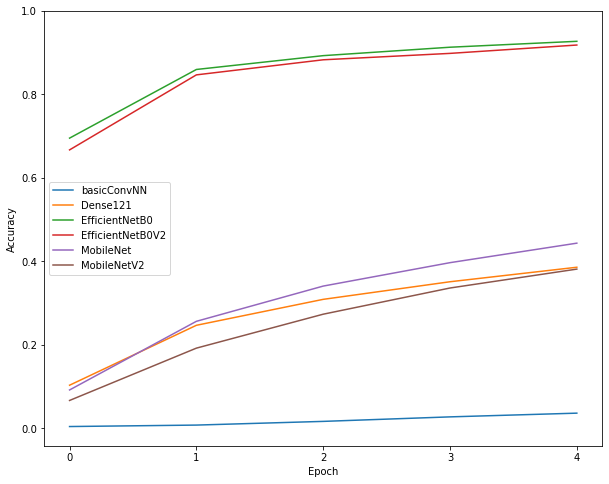

In [52]:
_=accuracy.plot(figsize=(10,8), xticks=range(5), yticks=np.arange(0,1.2,.2), xlabel='Epoch', ylabel='Accuracy')

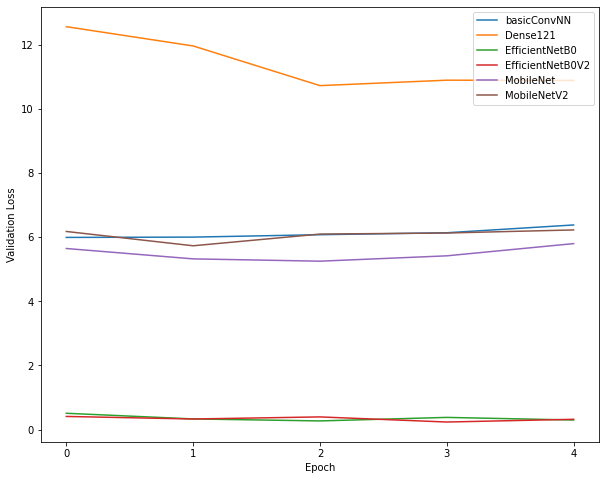

In [53]:
_=val_loss.plot(figsize=(10,8), xticks=range(5), xlabel='Epoch', ylabel='Validation Loss')

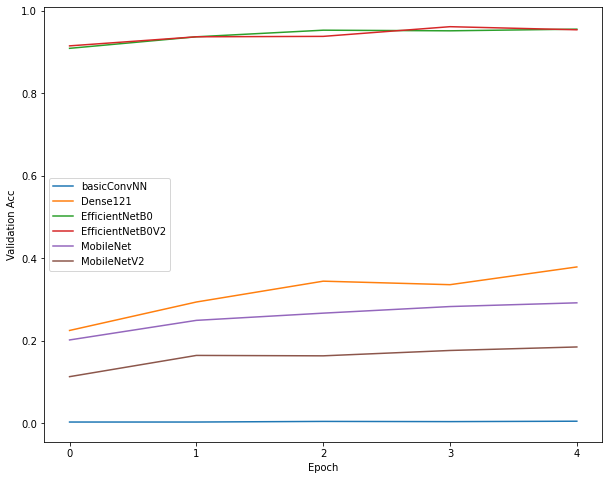

In [54]:
_=val_accuracy.plot(figsize=(10,8), xticks=range(5), xlabel='Epoch', ylabel='Validation Acc')